In [2]:
from google.colab import files #Для загрузки своей картинки
import numpy as np #Библиотека работы с массивами
import pandas as pd
from PIL import Image
from matplotlib import image
from matplotlib import pyplot as plt
import random #Для генерации случайных чисел
import math # Для округления
import os #Для работы с файлами
from sklearn. preprocessing import OneHotEncoder

from tensorflow.keras.models import Sequential, load_model #Сеть прямого распространения
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization #свертки и пр.
from tensorflow.keras.optimizers import Adam, Adadelta # оптимизаторы

# подключем диск
from google.colab import drive

%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Загрузка данных

In [7]:
our_size = (150, 150)

In [8]:
path = '/content/drive/MyDrive/data/Angry'
X_angry = []
for dirs,folder,files in os.walk(path):
  print(files)
  for f in files:
    img = Image.open(path + '/' + f).resize(our_size).convert('RGB')
    #img.show()
    for i in range(0, 360, 10):
      X_angry.append(np.asarray(img.rotate(i)))

['40-bigstock-Mad-fight-of-business-people-61801940.jpg', '800px-Angry-2766265_960_720.jpg', '60552212-angry-people-illustration-design-collection.jpg', '7-ways-anger-is-ruining-your-health-722x406.jpg', '1564075.jpg', '118-1183761_angry-person-transparent-images-png-angry-man-png.png', 'Angry-Customer.jpg', '32209658.jpg', '139-1393790_angry-person-png-pic-angry-man-clipart-png.png', '19_1016_DISCIPLESHIP_How-to-Deal-With-Angry-People_1021x640-696x436.jpg', '0346f330983a068db0633f96d4a13de873-06-angry.rsquare.w700.jpg', '439-4398363_angry-man-png-pictures-angry-person-png-transparent.png', '118-1183847_angry-person-png-picture.png', '5cd88fd321000035007f6cd2.jpeg', '68-688804_angry-person-png-images-angry-man-transparent-png.png', 'Anger_Controlls_Him.jpg', '3710928.jpg', 'How-To-Communicate-With-Irrational-And-Angry-People.jpg', 'Angry-Person-PNG-Pic.png', 'GettyImages-108328246-1024x683.jpg', 'Angry-man-shouting-and-pointing-to-camera-studio-shot.jpg', 'Angry-Person-Transparent-PNG.

In [9]:
path = '/content/drive/MyDrive/data/Happy'
X_happy = []
for dirs,folder,files in os.walk(path):
  print(files)
  for f in files:
    img = Image.open(path + '/' + f).resize(our_size).convert('RGB')
    for i in range(0, 360, 10):
      X_happy.append(np.asarray(img.rotate(i)))

['988689_Wallpaper2.jpg', '343515-worldhappinessreport1440.jpg', '427394C200000578-0-image-a-24_1500384481554.jpg', '110754-utyeqqosky-1547658396.jpeg', '7VR73K6EP5ETVEOUFANWBUYJEQ.jpg', '1HEoLBLidT2u4mhJ0oiDgig.png', '613k1XcpYCL.jpg', '35438_hd.jpg', '9b65a25adca61c48bcb01370116723e3--happy-people-brings.jpg', '2560px-Happy_People.jpg', '7-principles-of-successful-and-happy-people.png', '10-Habits-of-Happy-People-Seniors-Today.jpg', '1_617fd1e2590c2.jpg', '05-12-21-happy-people.jpg', '56f455011e0000b300705475.jpeg', '5400ea_cd54b25fdd2a4216819fe49413f0c976mv2.png', '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg', '170404-happy-workers-feature.jpg', 'A_Sep20_14_1189155141.jpg', '220px-Happy_People_A_Year_in_the_Taiga_poster.jpg', '81Vk4C.jpg', 'Dollarphotoclub_76084977-1.jpg', '1920px-face-smile.svg_.png.jpg', 'Overtly-Cheerful-Primer-Editorials-min-760x443.png', 'gdfVVm_MyCRtqpvdkt8vtSB1n_oz_CpwCq6vNMpj0S8.jpg', 'getty_152414899_97046097045006_68075.jpg', '

In [10]:
path = '/content/drive/MyDrive/data/Sad'
X_sad = []
for dirs,folder,files in os.walk(path):
  print(files)
  for f in files:
    img = Image.open(path + '/' + f).resize(our_size).convert('RGB')
    for i in range(0, 360, 10):
      X_sad.append(np.asarray(img.rotate(i)))

['CC_HE_1221887081_SituationalDepression-650x428.jpg', '640px-Crying-girl.jpg', 'Sad-man-sitting-in-bedroom-header.jpg', '360_F_548848756_IlV9Y9HV8chb6mSuc3PBamYRT9gIn8Vo.jpg', 'Sad-man-being-consoled-by-friends-in-group-therapy.jpg', '766x415_Depression_vs_Sadness-1-732x415.jpg', '39843138-sad-man.jpg', '73705bd7debb66c2afc780a22c223804.jpg', 'How-To-Make-Someone-Happy-When-Theyre-Sad.jpg', '09-113216-depressed_people_listen_to_sad_music_to_calm_and_uplift_says_study.jpg', '20201112-Alexithymia-844.jpg', '107188144-1675355909384-gettyimages-1302154722-dsc_9175.jpeg', 'Sadder-not-wiser_AdobeStock_219682170.jpg', '7RNXwSxCAKL8vGtXG2ZkyD-1200-80.jpg', 'Seasonal-affective-disorder.png', '405-4050267_sad-people-png-sad-person-transparent-background-png.png', 'Science_robotgait_124649246.jpg', '-unhappy-miss-good-chance-dressed-casually-isolated-yellow-wall_273609-37534.jpg', '1694806.jpg', 'Make-someone-sad-happy.jpg', '0x0.jpg', '5acf9ed1146e711e008b46d7.jpg', 'man-tears-tear-look.jpg', '

In [11]:
len(X_angry), len(X_happy), len(X_sad)

(3096, 3600, 2844)

In [12]:
X_angry = np.array(X_angry)
X_happy = np.array(X_happy)
X_sad = np.array(X_sad)

In [13]:
len(X_angry)

3096

#Подготовка данных для обучения

In [14]:
X = np.concatenate([X_angry, X_happy, X_sad])
X.shape

(9540, 150, 150, 3)

In [ ]:
#1366×768 - к этому разрешению подогнали все наши изображения. Кроме того видим что тут все транспонировано

In [15]:
y = np.concatenate([np.ones(X_angry.shape[0], 'int'), np.ones(X_happy.shape[0], 'int')*2, np.ones(X_sad.shape[0], 'int')*3])

In [16]:
y

array([1, 1, 1, ..., 3, 3, 3])

In [17]:
encoder = OneHotEncoder(handle_unknown='ignore')

y = pd.DataFrame(encoder.fit_transform(pd.DataFrame(y)).toarray()).to_numpy().astype('int')
# Таким образом:
# [1 0 0] - angry
# [0 1 0] - happy
# [0 0 1] - sad

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7632, 150, 150, 3), (7632, 3), (1908, 150, 150, 3), (1908, 3))

#Обучение нейросети

Epoch 1/15
77/77 [==============================] - 8s 83ms/step - loss: 1.1214 - accuracy: 0.5075 - val_loss: 0.9535 - val_accuracy: 0.5204
Epoch 2/15
77/77 [==============================] - 6s 81ms/step - loss: 0.8392 - accuracy: 0.6133 - val_loss: 0.8330 - val_accuracy: 0.6316
Epoch 3/15
77/77 [==============================] - 6s 80ms/step - loss: 0.6997 - accuracy: 0.6859 - val_loss: 0.6799 - val_accuracy: 0.6960
Epoch 4/15
77/77 [==============================] - 6s 82ms/step - loss: 0.5570 - accuracy: 0.7539 - val_loss: 0.6004 - val_accuracy: 0.7285
Epoch 5/15
77/77 [==============================] - 6s 79ms/step - loss: 0.3844 - accuracy: 0.8412 - val_loss: 0.5493 - val_accuracy: 0.7568
Epoch 6/15
77/77 [==============================] - 6s 77ms/step - loss: 0.2682 - accuracy: 0.8886 - val_loss: 0.3576 - val_accuracy: 0.8470
Epoch 7/15
77/77 [==============================] - 6s 75ms/step - loss: 0.1631 - accuracy: 0.9416 - val_loss: 0.3116 - val_accuracy: 0.8716
Epoch 8/15
77

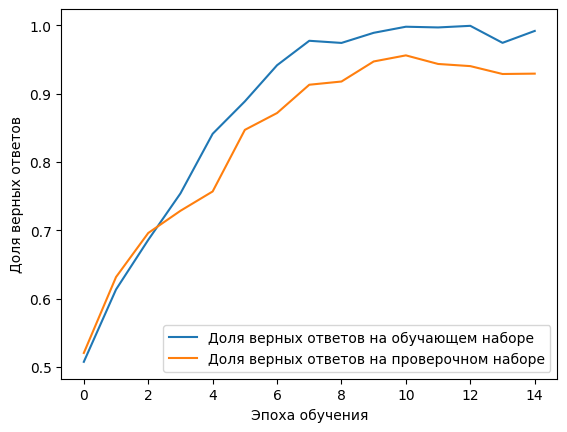

In [27]:
#задаём batch_size
batch_size = 100
input_shape = (150, 150, 3)

#Создаем последовательную модель
model = Sequential()

model.add(BatchNormalization(input_shape=input_shape))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(3, activation='softmax'))


model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


history = model.fit(X_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=15,
                    validation_data=(X_test, y_test),
                    verbose=1)

#Отображаем график точности обучения
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_1 (Bat  (None, 150, 150, 3)       12        
 chNormalization)                                                
                                                                 
 conv2d_3 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 75, 75, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                      

In [20]:
model.save('/content/drive/MyDrive/my_model1')


#Демонстрация работы

In [21]:
model_loaded = load_model('/content/drive/MyDrive/my_model1')

In [22]:
def load_img(path):
  return Image.open(path).resize(our_size).convert('RGB')

In [23]:
def load_array(path):
  return np.asarray(load_img(path))

In [24]:
load_img("/content/drive/MyDrive/photo_2023-07-15_12-11-07.jpg").show()

In [25]:
print(np.rint(model_loaded.predict(np.array([load_array("/content/drive/MyDrive/photo_2023-07-15_12-11-07.jpg")]))).astype('int'))

1/1 [==============================] - 0s 299ms/step
[[1 0 0]]
